In [65]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from kernels_class import *

# check variance

In [66]:
def generate_sample(scale):
    n_source_plus = int(250*scale)
    n_source_minus = int(50*scale)
    n_source = n_source_plus + n_source_minus
    pi_source = n_source_plus/n_source

    n_target_plus = int(400*scale)
    n_target_minus = int(100*scale)
    n_target = n_target_plus + n_target_minus
    pi_target = n_target_plus/n_target

    p_source_plus = np.random.normal(loc=np.array([0,0]), size=(n_source_plus, 2))
    p_source_minus = np.random.normal(loc=np.array([2,2]), size=(n_source_minus, 2))

    p_target_plus = np.random.normal(loc=np.array([0,0]), size=(n_target_plus, 2))
    p_target_minus = np.random.normal(loc=np.array([2,2]), size=(n_target_minus, 2))

    p_target = np.vstack((p_target_plus, p_target_minus))

    return p_source_plus, p_source_minus, p_target

### nrm estimator

In [67]:
scale0 = 20

In [68]:
p_source_plus, p_source_minus, p_target = generate_sample(scale0)

In [69]:
est = estimator_RHKS(p_target, p_source_plus, p_source_minus)

In [70]:
est.estimate_pi_nrm()

In [71]:
est.pi_nrm

np.float64(0.7972791264892857)

In [72]:
est.compute_sigmas2_nrm_1()
est.compute_variance_nrm_1()

In [73]:
est.compute_variance_nrm_1_known_pi(0.8)

np.float64(0.033875157266070176)

In [74]:
est.var_nrm_1

np.float64(0.0340379334513582)

In [75]:
est.compute_K2()
est.compute_sigmas2_nrm_2()
est.compute_variance_nrm_2()

In [76]:
est.var_nrm_2

np.float64(0.0983506270425409)

In [77]:
est.compute_variance_nrm_2_known_pi(0.8)

np.float64(0.09768276566643905)

# scale var

In [56]:
N = 100
scale_seq = [5, 10, 12.5, 15]

In [57]:
res1 = np.zeros((N, len(scale_seq)))
# res2 = 

for i in tqdm(range(N)):
    for j in range(len(scale_seq)):

        p_source_plus, p_source_minus, p_target = generate_sample(scale_seq[j])
        est_tmp = estimator_RHKS(p_target, p_source_plus, p_source_minus)
        est_tmp.estimate_pi_nrm()

        res1[i, j] = est_tmp.pi_nrm

100%|██████████| 100/100 [07:07<00:00,  4.28s/it]


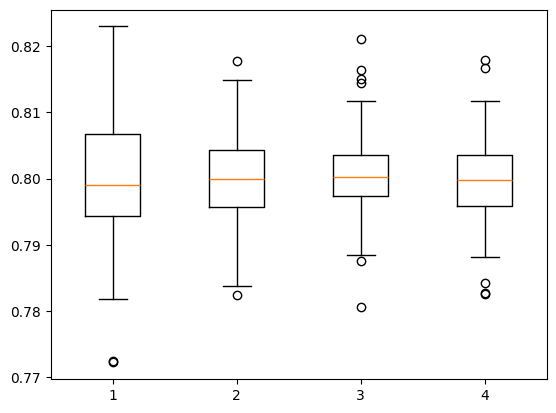

In [58]:
plt.boxplot(res1)
# plt.plot([(n_target_plus/n_target),(n_target_plus/n_target)], [0,30])
plt.show()

In [59]:
n_source_plus = 250*np.array(scale_seq)
n_source_minus = 250*np.array(scale_seq)
n_target = 500*np.array(scale_seq)
denominator = 1/n_source_plus + 1/n_source_minus + 1/n_target

In [62]:
np.var((res1-0.8)/np.sqrt(denominator), axis=0)

array([0.04906432, 0.04972073, 0.05522735, 0.05989652])

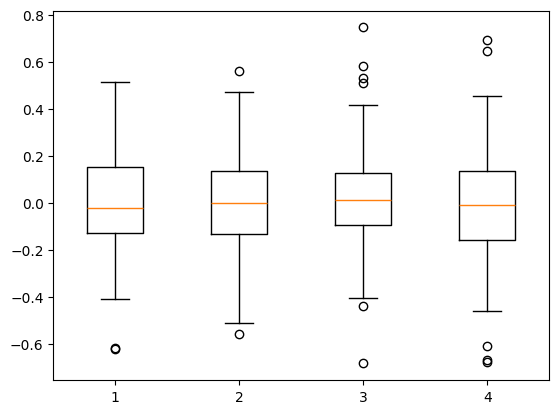

In [64]:
plt.boxplot((res1 - 0.8)/np.sqrt(denominator))
# plt.plot([(n_target_plus/n_target),(n_target_plus/n_target)], [0,30])
plt.show()

In [116]:
x_seq = np.linspace(-2,2, 100)
from scipy.stats import norm
y_seq1 = norm.pdf(x_seq, loc=0,  scale=np.sqrt((est.var_nrm_1)))
y_seq2 = norm.pdf(x_seq, loc=0,  scale=np.sqrt((est.var_nrm_2)))
y_seq3 = norm.pdf(x_seq, loc=0,  scale=0.65)

In [117]:
np.sqrt((est.var_nrm_1))

np.float64(0.2792708526258495)

In [118]:
denominator = est.s_n
1/denominator

983.6065573770491

In [14]:
np.var((res1 - 0.8)/np.sqrt(denominator))

NameError: name 'res1' is not defined

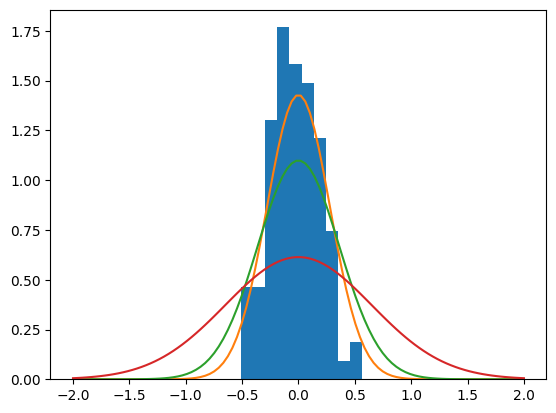

In [ ]:
plt.hist((res1 - (n_target_plus/n_target))/np.sqrt(denominator), density=True)
plt.plot(x_seq, y_seq1)
plt.plot(x_seq, y_seq2)
plt.plot(x_seq, y_seq3)
plt.show()

In [34]:
def RBF_kernel(x, y, sigma=1.0, gamma=None):
    """Evaluates the radial basis function (RBF) kernel on input arrays.

    Parameters
    ----------
    x, y : array like
        Input values.

    sigma : float
        Param

    gamma : float
        Param

    Returns
    -------
    ndarray
        RBF kernel evaluated on x and y.
    """ 
    RBF_result = None

    if sigma is not None:
        RBF_result = np.exp(-1/(sigma**2) * cdist(x, y, metric="sqeuclidean"))

    if sigma is None and gamma is not None:
        RBF_result = np.exp(-gamma * cdist(x, y, metric="sqeuclidean"))

    return RBF_result

def E_Phi_squared(k_x_x, z=None):
    if z is not None:
        # k_x_z = RBF_kernel(x,z)
        res = 0
        # den = 0
        # for i in range(1):
        #     for j in range(1,x.shape[0]):
        #         for k in range(1,x.shape[0]):#range(j, x.shape[0]):
        #             if k != j:
        #                 res += k_x_z[j,i]*k_x_z[k,i]
        #                 den += 1
        # res = res/den
        return res
    else:
        # k_x_x = RBF_kernel(x,x)
        res = np.zeros(k_x_x.shape[0])
        den = 0
        for i in range(k_x_x.shape[0]):
            for j in range(k_x_x.shape[0]):
                if j != i:
                    for k in range(k_x_x.shape[0]):
                        if k != j and k != i:
                            res[i] += k_x_x[i,j]*k_x_x[i,k]
                            den += 1
        res = res/den
        return res

In [ ]:
def E_K_X1_X2_K_X1_X3(K_X_X):

    K_X_X_no_diag = K_X_X.copy()
    np.fill_diagonal(K_X_X_no_diag, 0)
    
    # Row sums and row squared sums (excluding diagonal)
    row_sums = np.sum(K_X_X_no_diag, axis=0)
    row_sums_sq = row_sums**2
    row_sq_sums = np.sum(K_X_X_no_diag**2, axis=0)
    
    # Final result
    result =(row_sums_sq - row_sq_sums)

    n = K_X_X.shape[0]

    return result/(n*(n-1)*(n-2))

In [ ]:
res1 = E_K_X1_X2_K_X1_X3(est.K_target_target)

In [ ]:
res2 = np.sum(E_Phi_squared(est.K_target_target))

In [ ]:
np.sum(res1), res2

(np.float64(0.06843004544466771), np.float64(0.06843004544466764))

ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

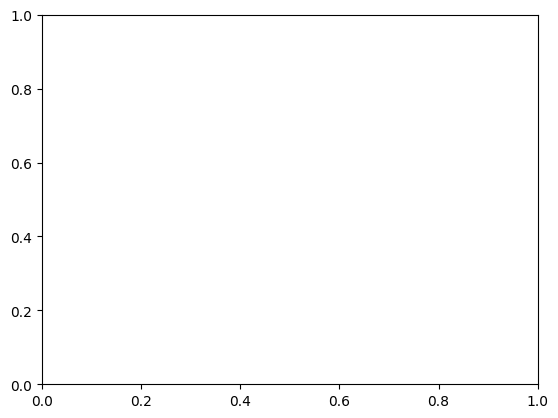

In [ ]:
plt.plot(res1, res2, 'o')

In [ ]:
res1[:5], res2[:5]

(array([23943.19721905, 37501.90476083, 33016.60983946,  3761.03266923,
        18860.4682658 ]),
 array([23943.19721905, 37501.90476083, 33016.60983946,  3761.03266923,
        18860.4682658 ]))

In [ ]:
def E_K_X1_Y1_K_X1_Y2(K_X_Y):

    n_X = K_X_Y.shape[0]
    n_Y = K_X_Y.shape[1]
    
    squared_sum_Y1_K_X1_Y1 = np.sum(K_X_Y, axis=1)**2
    print(squared_sum_Y1_K_X1_Y1.shape)
    sum_Y1_squared_K_X1_Y1 = np.sum(K_X_Y**2, axis=1)
    
    sum_X1 = np.sum(squared_sum_Y1_K_X1_Y1 - sum_Y1_squared_K_X1_Y1)

    return sum_X1/(n_X*n_Y*(n_Y-1))

In [ ]:
E_K_X1_Y1_K_X1_Y2(est.K_target_source_negative)

(500,)


np.float64(0.03563490555873755)